In [1]:
import pandas as pd

file_path = 'Booking_Data_csv.csv'
data = pd.read_csv(file_path)

data.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Unnamed: 17
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,$0.00,Check-Out,2015-07-01,0,$0.00,$0.00,NaN
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,$0.00,Check-Out,2015-07-01,0,$0.00,$0.00,NaN
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,$75.00,Check-Out,2015-07-02,0,$75.00,$0.00,NaN
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,$75.00,Check-Out,2015-07-02,0,$75.00,$0.00,NaN
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,$98.00,Check-Out,2015-07-03,0,$196.00,$0.00,NaN


In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check the data types, especially for columns with currency values to see how they're being interpreted
data_types = data.dtypes

# Check for unique values in 'Unnamed: 17' to decide on its handling
unique_values_unnamed_17 = data['Unnamed: 17'].unique()

missing_values, data_types, unique_values_unnamed_17

(Booking ID                   0
 Hotel                        0
 Booking Date                 0
 Arrival Date                 0
 Lead Time                    0
 Nights                       0
 Guests                       0
 Distribution Channel         0
 Customer Type                0
 Country                    488
 Deposit Type                 0
 Avg Daily Rate               0
 Status                       0
 Status Update                0
 Cancelled (0/1)              0
 Revenue                      0
 Revenue Loss                 0
 Unnamed: 17             119390
 dtype: int64,
 Booking ID                int64
 Hotel                    object
 Booking Date             object
 Arrival Date             object
 Lead Time                 int64
 Nights                    int64
 Guests                    int64
 Distribution Channel     object
 Customer Type            object
 Country                  object
 Deposit Type             object
 Avg Daily Rate           object
 Status      

In [3]:
# Remove the 'Unnamed: 17' column
data.drop(columns=['Unnamed: 17'], inplace=True)

# Convert currency columns to numeric
currency_columns = ['Avg Daily Rate', 'Revenue', 'Revenue Loss']
for col in currency_columns:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

# Handle missing values in 'Country' column by imputing with 'Unknown'
data['Country'].fillna('Unknown', inplace=True)

# Convert date columns to datetime format
date_columns = ['Booking Date', 'Arrival Date', 'Status Update']
for col in date_columns:
    data[col] = pd.to_datetime(data[col])

# Check the changes
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               119390 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

(None,
    Booking ID   Hotel Booking Date Arrival Date  Lead Time  Nights  Guests  \
 0           1  Resort   2014-07-24   2015-07-01        342       0       2   
 1           2  Resort   2013-06-24   2015-07-01        737       0       2   
 2           3  Resort   2015-06-24   2015-07-01          7       1       1   
 3           4  Resort   2015-06-18   2015-07-01         13       1       1   
 4           5  Resort   2015-06-17   2015-07-01         14       2       2   
 
   Distribution Channel Customer Type         Country Deposit Type  \
 0               Direct     Transient        Portugal   No Deposit   
 1               Direct     Transient        Portugal   No Deposit   
 2               Direct     Transient  United Kingdom   No Deposit   
 3            Corporate     Transient  United Kingdom   No Deposit   
 4  Online Travel Agent     Transient  United Kingdom   No Deposit   
 
    Avg Daily Rate     Status Status Update  Cancelled (0/1)  Revenue  \
 0             0.0  Ch

C:\Users\THIS PC\AppData\Local\Temp\ipykernel_13508\3129759136.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  monthly_bookings_pivot = monthly_bookings.pivot("Month", "Year", "Bookings")


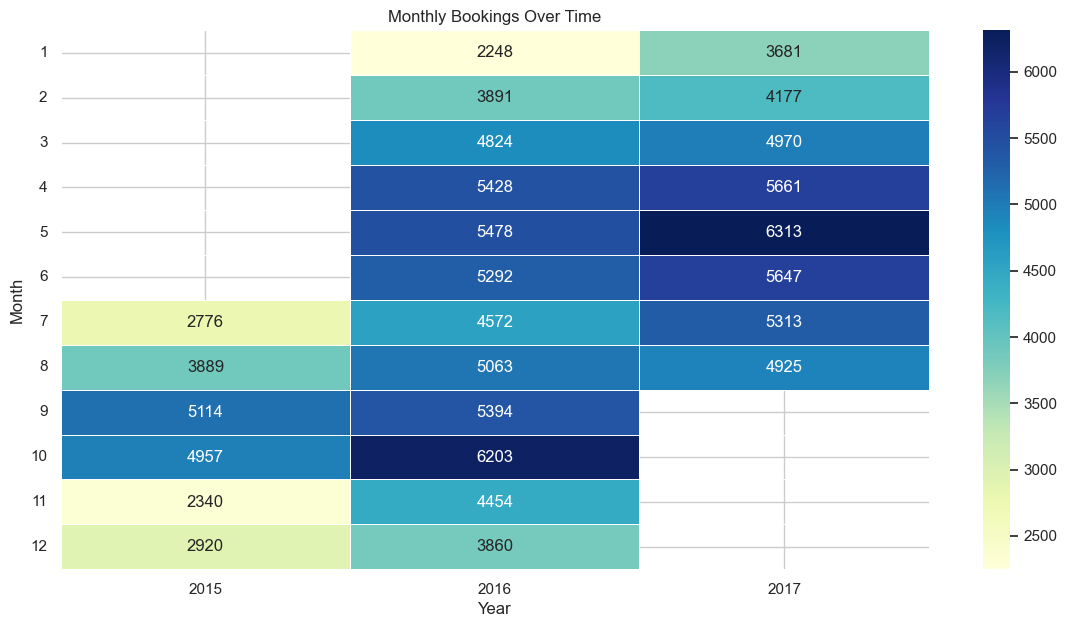

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style for plots
sns.set(style="whitegrid")

# Analyzing booking patterns over time - We'll start by looking at the number of bookings per month
data['Year'] = data['Arrival Date'].dt.year
data['Month'] = data['Arrival Date'].dt.month

# Aggregate data to count bookings by month and year
monthly_bookings = data.groupby(['Year', 'Month']).size().reset_index(name='Bookings')

# Pivot data for easier plotting
monthly_bookings_pivot = monthly_bookings.pivot("Month", "Year", "Bookings")

# Plotting
plt.figure(figsize=(14, 7))
sns.heatmap(monthly_bookings_pivot, annot=True, fmt=".0f", linewidths=.5, cmap="YlGnBu")
plt.title('Monthly Bookings Over Time')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(rotation=0)
plt.show()

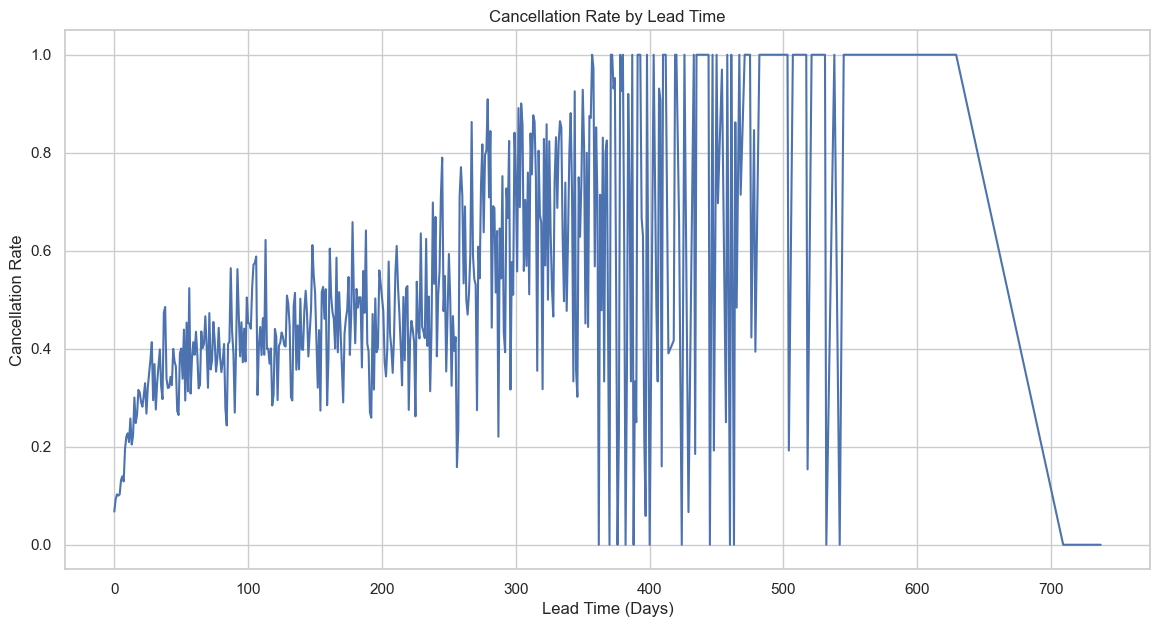

In [5]:
# Analyzing the correlation between lead time and cancellation rates
# It's interesting to see if longer lead times are associated with higher cancellation rates.

# Group data by lead time, calculating the cancellation rate for each lead time
lead_time_cancellation_rate = data.groupby('Lead Time')['Cancelled (0/1)'].mean().reset_index(name='Cancellation Rate')

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(x='Lead Time', y='Cancellation Rate', data=lead_time_cancellation_rate)
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Cancellation Rate')
plt.show()

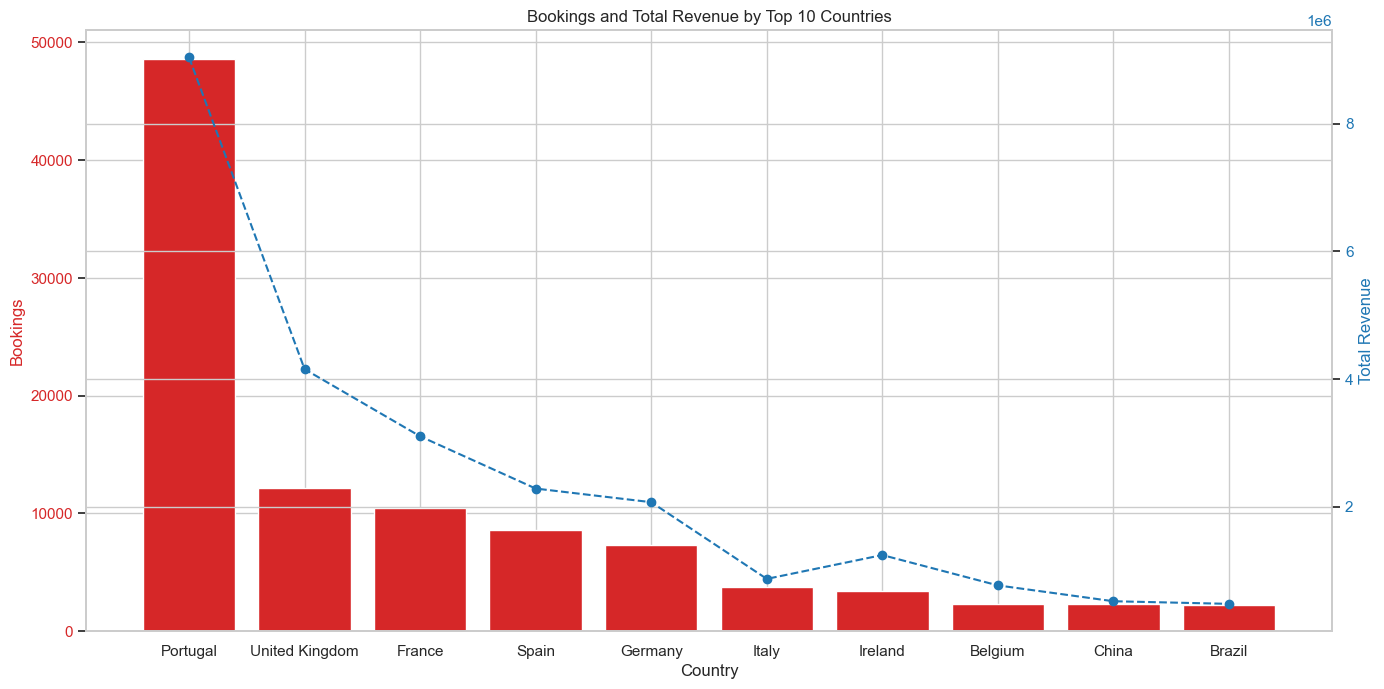

In [6]:
# Exploring distribution of guests by country and its impact on revenue
# We'll focus on the top 10 countries by the number of guests to see how these markets contribute to overall revenue.

# Group data by country, counting bookings and summing revenue
country_analysis = data.groupby('Country').agg(Bookings=('Booking ID', 'count'), TotalRevenue=('Revenue', 'sum')).reset_index()

# Sort by the number of bookings to get top 10 countries
top_countries = country_analysis.sort_values(by='Bookings', ascending=False).head(10)

# Plotting the number of bookings and total revenue contributed by the top 10 countries
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Country')
ax1.set_ylabel('Bookings', color=color)
ax1.bar(top_countries['Country'], top_countries['Bookings'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Total Revenue', color=color)  # We already handled the x-label with ax1
ax2.plot(top_countries['Country'], top_countries['TotalRevenue'], color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure the right y-label is not slightly clipped
plt.title('Bookings and Total Revenue by Top 10 Countries')
plt.show()

# This analysis could help understand which markets are most lucrative and whether high volumes of bookings correlate with high revenue.

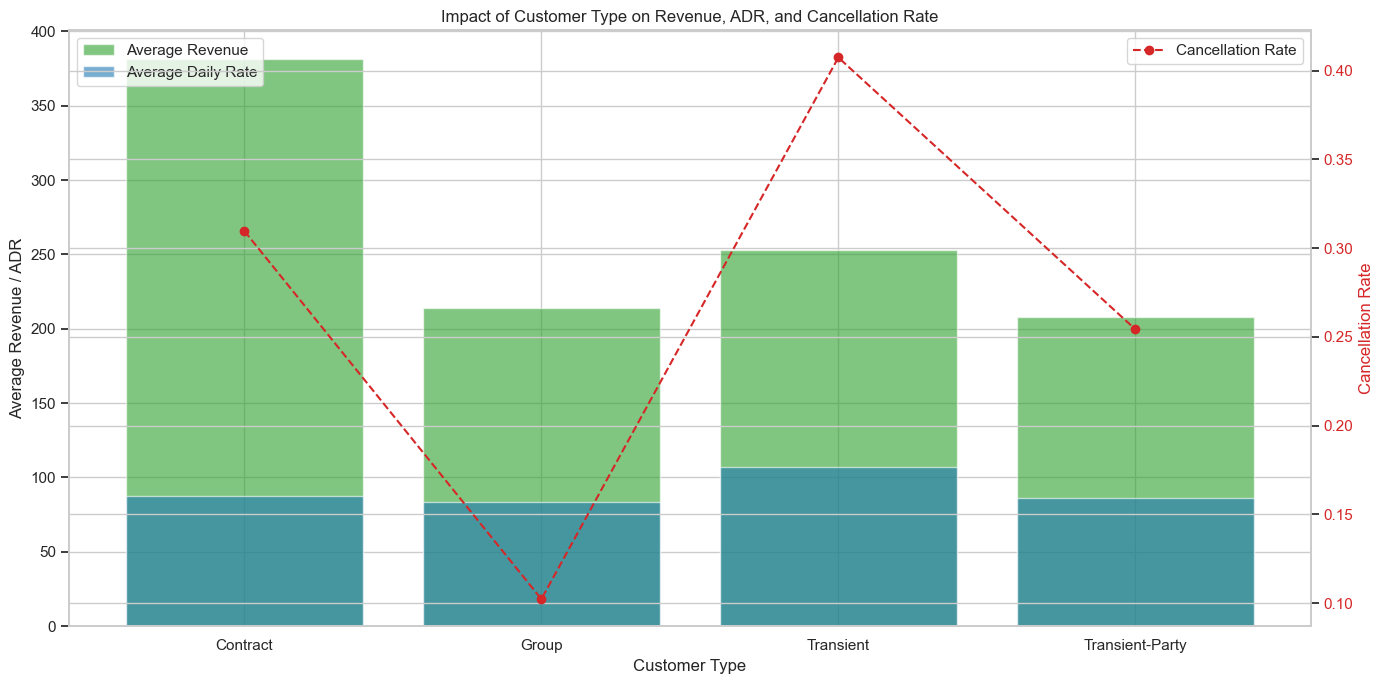

In [7]:
# Analyzing the impact of different customer types on revenue and cancellation rates

# Group data by customer type, aggregating average revenue, average daily rate (ADR), and cancellation rate
customer_type_analysis = data.groupby('Customer Type').agg(
    AverageRevenue=('Revenue', 'mean'),
    AverageDailyRate=('Avg Daily Rate', 'mean'),
    CancellationRate=('Cancelled (0/1)', 'mean')
).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for average revenue and ADR
customer_types = customer_type_analysis['Customer Type']
average_revenue = customer_type_analysis['AverageRevenue']
average_daily_rate = customer_type_analysis['AverageDailyRate']

ax1.bar(customer_types, average_revenue, color='tab:green', alpha=0.6, label='Average Revenue')
ax1.bar(customer_types, average_daily_rate, color='tab:blue', alpha=0.6, label='Average Daily Rate')
ax1.set_xlabel('Customer Type')
ax1.set_ylabel('Average Revenue / ADR')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Line plot for cancellation rate on secondary axis
ax2 = ax1.twinx()
cancellation_rate = customer_type_analysis['CancellationRate']
ax2.plot(customer_types, cancellation_rate, color='tab:red', marker='o', linestyle='--', label='Cancellation Rate')
ax2.set_ylabel('Cancellation Rate', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

plt.title('Impact of Customer Type on Revenue, ADR, and Cancellation Rate')
fig.tight_layout()
plt.show()

# This analysis provides insights into how different customer types contribute to revenue and their cancellation behaviors.

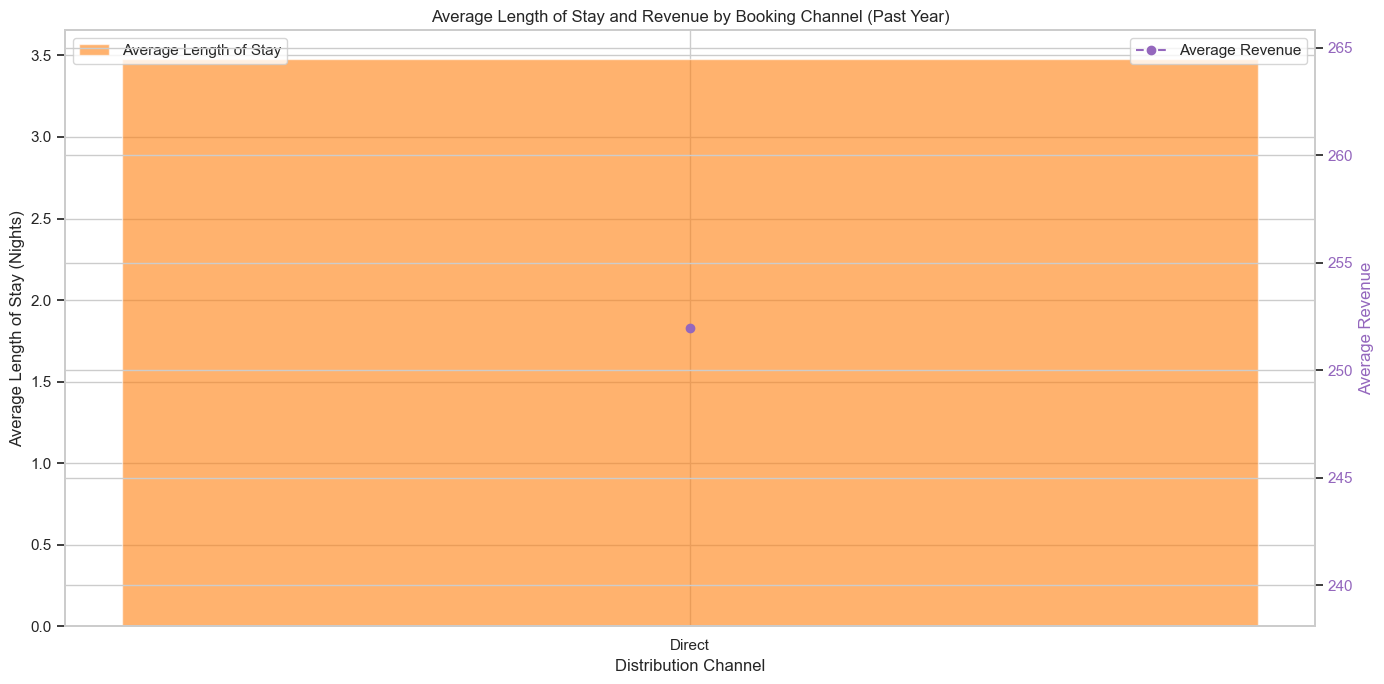

In [9]:
#How does the average length of stay vary by booking channel over the past year, and what is its impact on revenue?

from datetime import datetime

# Filter the dataset for bookings in the past year
# Determine the most recent booking date in the dataset to define "the past year" from that point
most_recent_booking_date = data['Arrival Date'].max()
one_year_ago = most_recent_booking_date - pd.DateOffset(years=1)

# Filter for bookings within the last year
data_last_year = data[data['Arrival Date'] >= one_year_ago]

# Analyze average length of stay and revenue by booking channel for the past year
analysis_past_year = data_last_year.groupby('Distribution Channel').agg(
    AverageLengthOfStay=('Nights', 'mean'),
    AverageRevenue=('Revenue', 'mean')
).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for average length of stay
channels = analysis_past_year['Distribution Channel']
length_of_stay = analysis_past_year['AverageLengthOfStay']

ax1.bar(channels, length_of_stay, color='tab:orange', alpha=0.6, label='Average Length of Stay')
ax1.set_xlabel('Distribution Channel')
ax1.set_ylabel('Average Length of Stay (Nights)')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Line plot for average revenue on secondary axis
ax2 = ax1.twinx()
average_revenue = analysis_past_year['AverageRevenue']
ax2.plot(channels, average_revenue, color='tab:purple', marker='o', linestyle='--', label='Average Revenue')
ax2.set_ylabel('Average Revenue', color='tab:purple')
ax2.tick_params(axis='y', labelcolor='tab:purple')
ax2.legend(loc='upper right')

plt.title('Average Length of Stay and Revenue by Booking Channel (Past Year)')
fig.tight_layout()
plt.show()

# This analysis could reveal how different booking channels impact guest behavior and revenue, providing insights for targeted strategies.


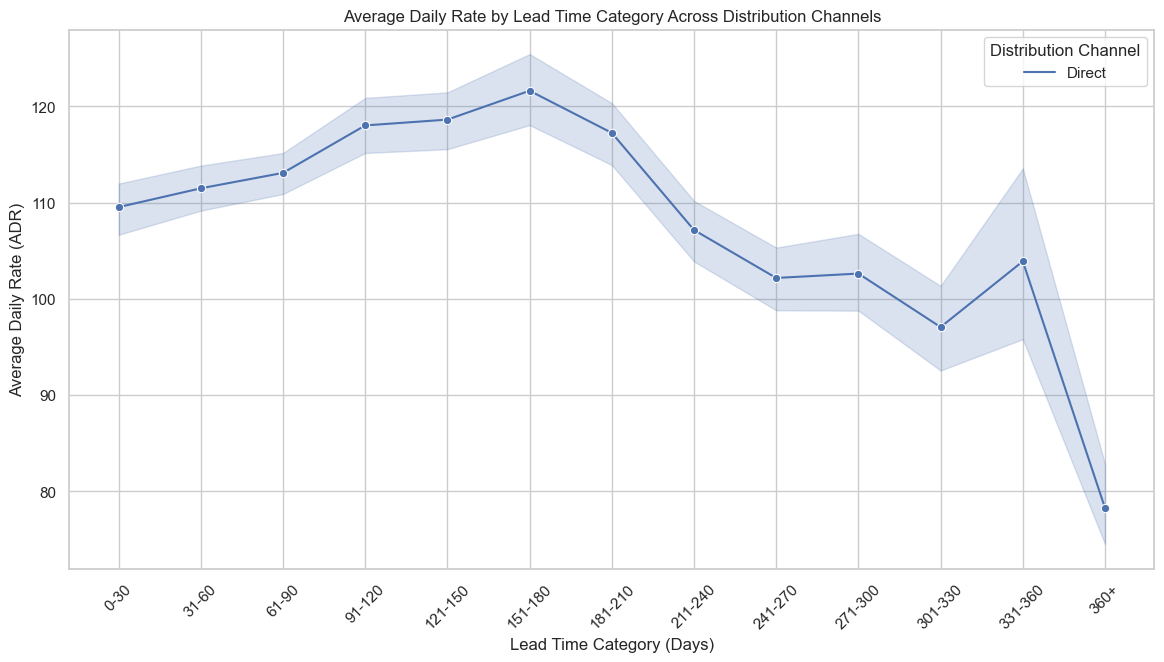

In [11]:
# Analyzing the correlation between lead times and ADRs across different distribution channels

# Group data by distribution channel and lead time, calculating average ADR for each
lead_time_adr_channel = data_last_year.groupby(['Distribution Channel', 'Lead Time']).agg(
    AverageADR=('Avg Daily Rate', 'mean')
).reset_index()

# Since there might be many unique lead times, we'll categorize them into bins for a clearer analysis
lead_time_adr_channel['Lead Time Category'] = pd.cut(lead_time_adr_channel['Lead Time'], bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, float('inf')], labels=['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301-330', '331-360', '360+'])

# For simplicity and clarity, we'll visualize the average ADR by lead time category for each distribution channel
plt.figure(figsize=(14, 7))
sns.lineplot(data=lead_time_adr_channel, x='Lead Time Category', y='AverageADR', hue='Distribution Channel', marker='o')
plt.title('Average Daily Rate by Lead Time Category Across Distribution Channels')
plt.xlabel('Lead Time Category (Days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.legend(title='Distribution Channel', loc='upper right')
plt.grid(True)
plt.show()

# This step will highlight if certain distribution channels tend to have higher or lower ADRs based on how far in advance the booking is made.


C:\Users\THIS PC\AppData\Local\Temp\ipykernel_13508\2965756357.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_year['Stay Category'] = pd.cut(data_last_year['Nights'], bins=bins, labels=labels, right=False)


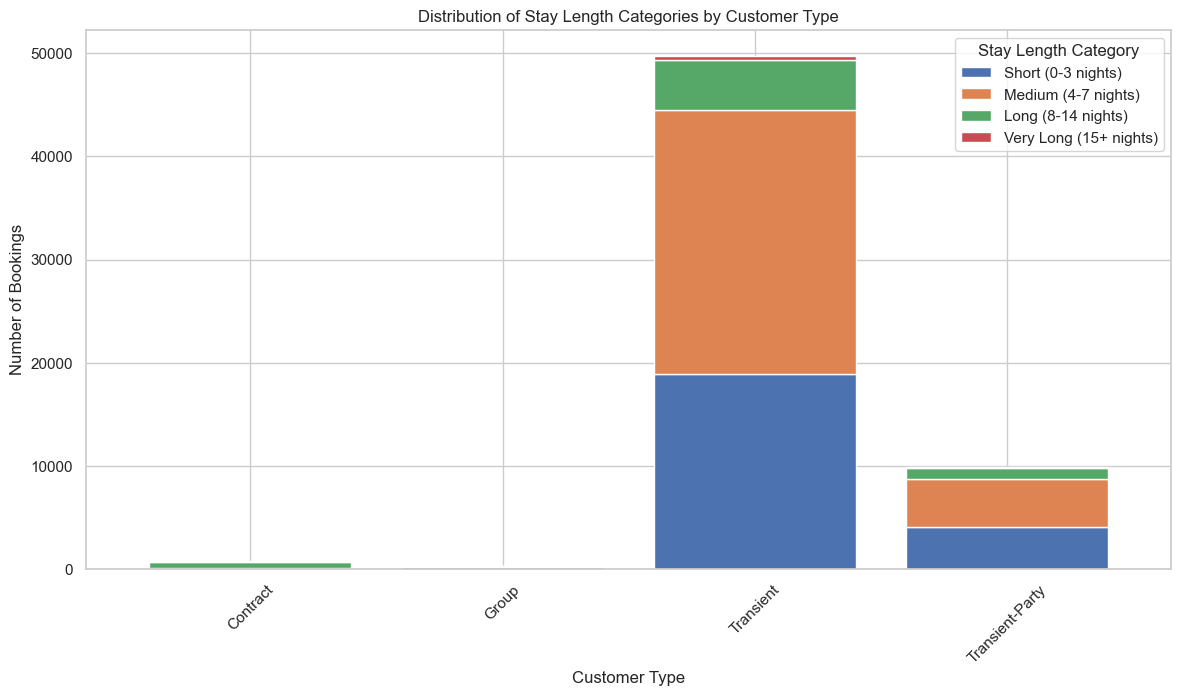

In [12]:
# Categorizing the length of stay into bins (Short, Medium, Long) for analysis
# Define bins for length of stay
bins = [0, 3, 7, 14, float('inf')]
labels = ['Short (0-3 nights)', 'Medium (4-7 nights)', 'Long (8-14 nights)', 'Very Long (15+ nights)']

# Categorize length of stay for each booking in the last year
data_last_year['Stay Category'] = pd.cut(data_last_year['Nights'], bins=bins, labels=labels, right=False)

# Analyze the distribution of stay categories across different customer types
stay_category_customer_type = data_last_year.groupby(['Customer Type', 'Stay Category']).size().unstack(fill_value=0)

# Plotting
stay_category_customer_type.plot(kind='bar', figsize=(14, 7), width=0.8, stacked=True)
plt.title('Distribution of Stay Length Categories by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Stay Length Category')
plt.show()

# This analysis aims to identify patterns in the length of stay preferences among different customer types, potentially informing targeted marketing or service offerings.


In [13]:
#What is the impact of deposit types on cancellation rates and average daily rates (ADR), specifically analyzing how these variables correlate across different customer types over the past year

# Step 1: Prepare the data focusing on deposit types, customer types, cancellation rates, and ADRs
data_deposit_analysis = data_last_year[['Deposit Type', 'Customer Type', 'Cancelled (0/1)', 'Avg Daily Rate']]

# To analyze the impact, we need to calculate the cancellation rate and average ADR by deposit type and customer type
# Group by Deposit Type and Customer Type
grouped_data_deposit = data_deposit_analysis.groupby(['Deposit Type', 'Customer Type']).agg(
    CancellationRate=('Cancelled (0/1)', 'mean'),
    AverageADR=('Avg Daily Rate', 'mean')
).reset_index()

grouped_data_deposit.head(), grouped_data_deposit.shape


(     Deposit Type    Customer Type  CancellationRate  AverageADR
 0      No Deposit         Contract          0.110974   84.276880
 1      No Deposit            Group          0.074830   89.694388
 2      No Deposit        Transient          0.340997  114.796731
 3      No Deposit  Transient-Party          0.196629   91.263660
 4  Non Refundable        Transient          1.000000   95.526577,
 (9, 4))

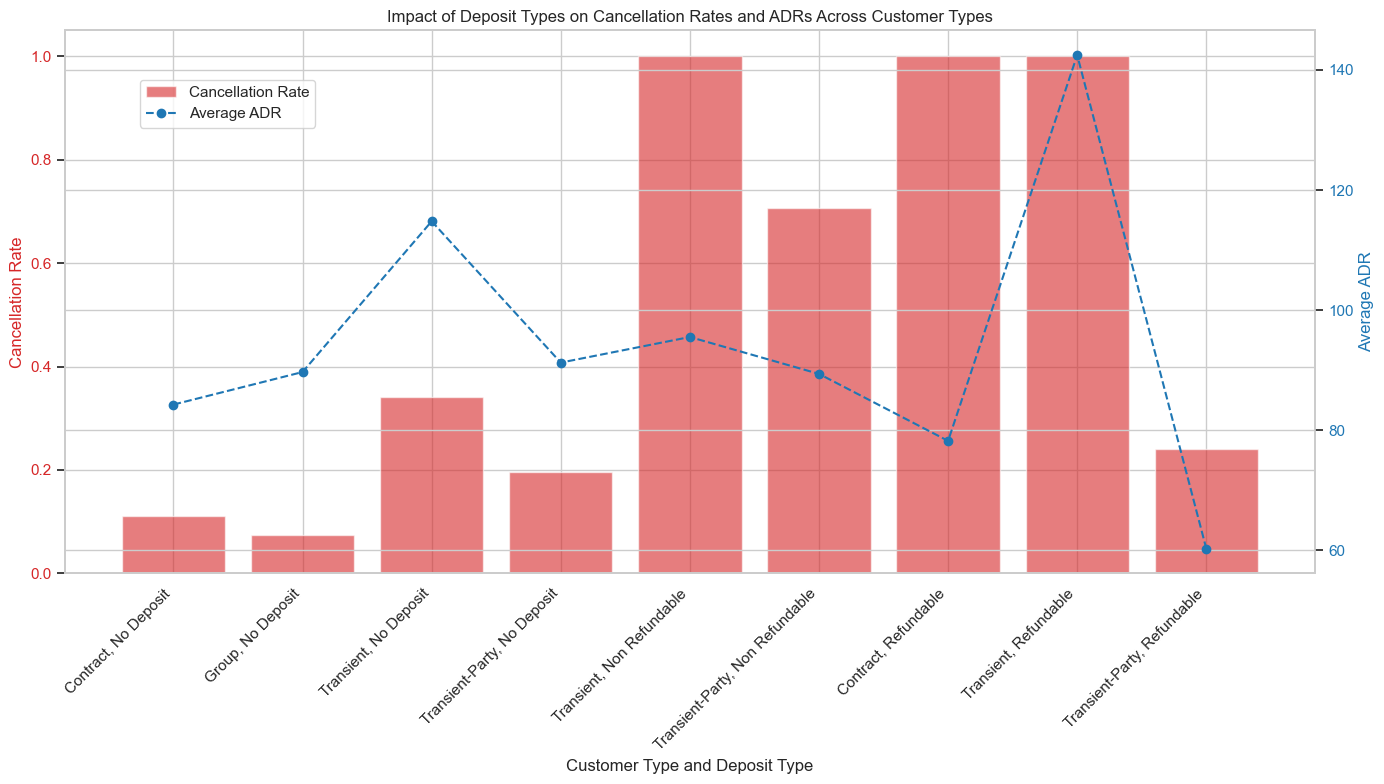

In [14]:
# Step 2: Visualize the impact of deposit types on cancellation rates and ADRs across customer types

# Setting up the figure
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting the cancellation rate
color = 'tab:red'
ax1.set_xlabel('Customer Type and Deposit Type')
ax1.set_ylabel('Cancellation Rate', color=color)
ax1.bar(grouped_data_deposit.index, grouped_data_deposit['CancellationRate'], color=color, alpha=0.6, label='Cancellation Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(grouped_data_deposit.index)
ax1.set_xticklabels(grouped_data_deposit[['Customer Type', 'Deposit Type']].apply(lambda x: f'{x[0]}, {x[1]}', axis=1), rotation=45, ha="right")

# Instantiating a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average ADR', color=color)  # We already handled the x-label with ax1
ax2.plot(grouped_data_deposit.index, grouped_data_deposit['AverageADR'], color=color, marker='o', linestyle='--', label='Average ADR')
ax2.tick_params(axis='y', labelcolor=color)

# Adding a legend and a title
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.title('Impact of Deposit Types on Cancellation Rates and ADRs Across Customer Types')

fig.tight_layout()  # To ensure the right y-label is not slightly clipped
plt.show()

# This visualization aims to highlight how different deposit requirements influence booking cancellation rates and pricing strategies across various customer segments.


**Cancellation Rate Variability:** The cancellation rate significantly varies between different combinations of deposit types and customer types. Notably, bookings labeled as "Non Refundable" for transient customers have a 100% cancellation rate, suggesting that these might be pre-labeled as non-refundable due to being canceled.
**
ADR Correlation**: The average ADR also shows variation across these segments, indicating that deposit type and customer behavior (as reflected in cancellation rates) could influence or correlate with the pricing strategy employed by the hotel.

**
Strategic Implication**s: Understanding these dynamics is crucial for the hotel chain. It suggests that adjusting deposit policies and pricing strategies by customer type could potentially reduce cancellations and optimize revenue.